In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dane = pd.read_csv('dane_dif.csv', sep = ';', decimal = ',',
                   index_col=0)
dane

,dzien,prodA,prodB,Miesiac
0,1,8.2,1.4,luty
1,2,9.9,0.4,luty
2,3,6.1,0.7,luty
3,4,6.4,1.9,luty
4,5,8.2,0.7,luty
...,...,...,...,...
85,27,1.5,0.7,styczen
86,28,0.7,0.2,styczen
87,29,2.9,0.9,styczen
88,30,2.3,0.8,styczen


In [3]:
dane['Sprzedaz calkowita'] = dane['prodA'] + dane['prodB']
kolejnoscMiesiecy = {'styczen': 1, 'luty': 2, 'marzec': 3}
dane['Miesiac'] = pd.Categorical(dane['Miesiac'], categories=kolejnoscMiesiecy.keys(), ordered=True)
dane_posortowane = dane.sort_values(by=['Miesiac', 'dzien'])
dane_posortowane.reset_index(drop=True, inplace=True)
sprzedaz = dane_posortowane[['dzien', 'Miesiac', 'Sprzedaz calkowita']].copy()
sprzedaz.describe

<bound method NDFrame.describe of     dzien  Miesiac  Sprzedaz calkowita
0       1  styczen                 3.5
1       2  styczen                 1.9
2       3  styczen                 0.7
3       4  styczen                 1.9
4       5  styczen                 2.6
..    ...      ...                 ...
85     27   marzec                 9.8
86     28   marzec                17.7
87     29   marzec                 9.8
88     30   marzec                17.8
89     31   marzec                 4.2

[90 rows x 3 columns]>

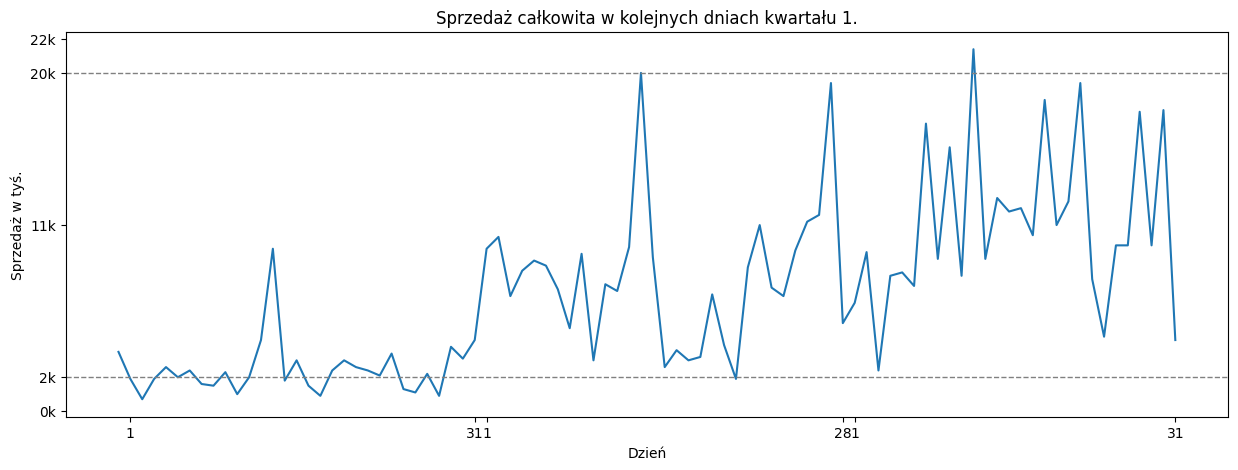

In [4]:
plt.figure(figsize=(15, 5))

plt.plot(sprzedaz.index, sprzedaz['Sprzedaz calkowita'])
plt.title('Sprzedaż całkowita w kolejnych dniach kwartału 1.')
plt.xlabel('Dzień')
plt.ylabel('Sprzedaż w tyś.')

yticksy = (0, 2, 11, 20, 22)
yticksy_labels = ('0k','2k', '11k', '20k', '22k')

xticks_positions = [1, 30, 31, 61, 62, 89]
xticks_labels = ['1', '31', '1', '28', '1', '31']

plt.xticks(xticks_positions, xticks_labels)
plt.yticks(yticksy, yticksy_labels)

# Dodanie kreski poziomej przerywanej dla oznaczenia 2k
plt.axhline(y=2, color='gray', linestyle='--', linewidth=1, label='2k')
plt.axhline(y=20, color='gray', linestyle='--', linewidth=1, label='20k')

plt.show()

In [5]:
punkty = dane_posortowane.index[dane_posortowane['prodB'] == dane_posortowane['prodB'].max()]
# maksima_dla_miesiecy = sprzedaz.groupby('Miesiac', observed=False)['prodB'].idxmax()
# maksima_dla_miesiecy = sprzedaz.index[sprzedaz['prodB'] == sprzedaz['prodB'].max()]


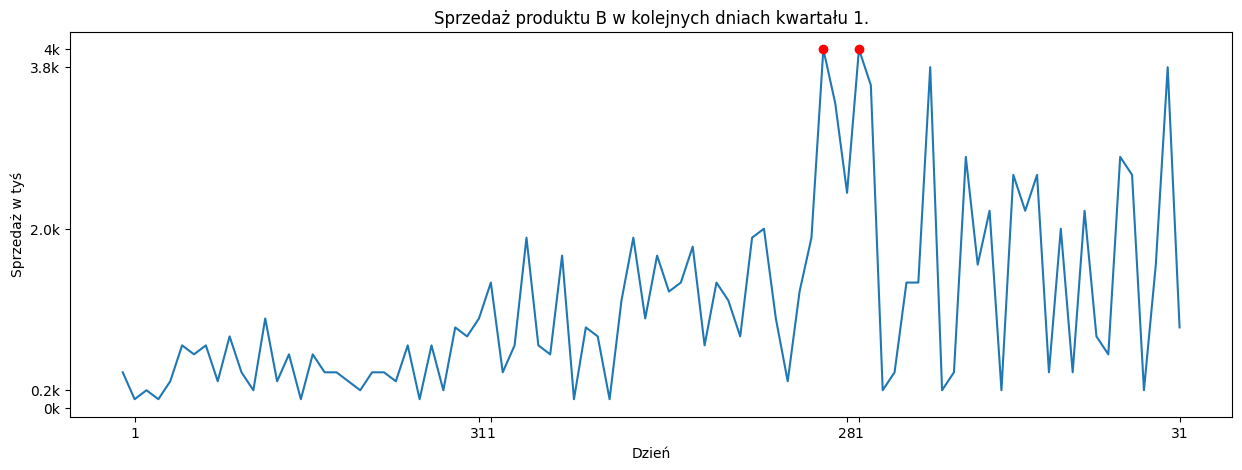

In [6]:
plt.figure(figsize=(15, 5))
plt.plot(dane_posortowane.index, dane_posortowane['prodB'])
plt.plot(punkty, dane_posortowane.loc[punkty, 'prodB'], 'ro')
plt.title('Sprzedaż produktu B w kolejnych dniach kwartału 1.')
plt.xlabel('Dzień')
plt.ylabel('Sprzedaż w tyś')
yticksy = (0, 0.2, 2, 3.8, 4)
yticksy_labels = ('0k', '0.2k', '2.0k', '3.8k','4k')
xticks_positions = [1, 30, 31, 61, 62, 89] 
xticks_labels = ['1', '31', '1', '28', '1', '31']  
plt.xticks(xticks_positions, xticks_labels)
plt.xticks()
plt.yticks(yticksy, yticksy_labels)
plt.show()


In [7]:
min_val = int(dane['Sprzedaz_calkowita'].min())
min_val = min_val - 1 if min_val >0 else min_val

max_val = int(dane['Sprzedaz_calkowita'].max())
max_val = max_val +1

half_val= (min_val+max_val) / 2

plt.figure(figsize=(10,5))
plt.plot(dane['Sprzedaz_calkowita'] )

custom_y_ticks = (min_val, min_val+2,half_val,max_val-2,max_val)
custom_y_labels = [f"{min_val}k","2k","11k","20k", "22k"]
xticks_positions = [1, 30, 31, 61, 62, 89]
xticks_labels = ['1', '31', '1', '28', '1', '31']

grid_val = [2, max_val-2]

for value in grid_val:
  plt.axhline(y=value, linestyle='--',linewidth=0.5, color='gray')

plt.ylim(min_val,max_val)
plt.yticks(custom_y_ticks, custom_y_labels)
plt.xticks(xticks_positions,xticks_labels )
plt.xlabel('Dzien')
plt.ylabel('Sprzedaz w tys')
plt.title("Sprzedaz calkowita w kolejnych dniach kwartalu 1")

KeyError: 'Sprzedaz_calkowita'